In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import featexp
from string import punctuation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics  
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings('ignore')


In [34]:
def test_meilleur_model(path_to_csv):
  
    print('------------------------')
    print('FIRST MODEL')

    data = pd.read_csv(path_to_csv)
    data = data.dropna()
    print('--drop na--')

    data['review_length']  = data['review_content'].str.len()
    data['title_length'] = data['review_title'].str.len()
    print('--review length and title length columns creation--')

    data['first_letter'] = data['review_content'].astype(str).str[0]
    data['first_letter_title'] = data['review_title'].astype(str).str[0]
    data['is_upper'] = data['first_letter'].str.isupper()
    data['is_upper_title'] = data['first_letter_title'].str.isupper()
    print('--Review first letter is upper and title first letter is upper columns creation--')

    enc = OneHotEncoder(handle_unknown='ignore')
    enc_df = pd.DataFrame(enc.fit_transform(data[['review_stars']]).toarray())
    data = data.join(enc_df)
    data = data.dropna()
    print('--One hot encoder on review stars column--')

    X = data[['is_upper_title',
         'review_length', 'title_length','is_upper',0,1,2,3,4]]
    y = data[['Target']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
    clf = RandomForestClassifier(n_estimators = 100)  
    clf.fit(X_train, y_train)
  
    y_pred = clf.predict(X_test)
    y_pred_val = clf.predict(X_val)
    print("Metrics accuracy score: ", metrics.accuracy_score(y_val, y_pred_val))
    print("ROC_AUC_SCORE : ",roc_auc_score(y_val, clf.predict_proba(X_val)[:, 1]))
    probs = clf.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_curve(fper, tper)
    print('------------------------')
    print('Second model')
    tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'french')
    print('--TfidfVectorizer--')
    X_train_bis, X_test_bis, y_train_bis, y_test_bis = train_test_split(data.review_content, data.Target, test_size=.2, random_state=42)
    X_train_bis, X_val_bis, y_train_bis, y_val_bis = train_test_split(X_train_bis, y_train_bis, test_size=0.25, random_state=1)
    vectorizer = TfidfVectorizer().fit(X_train_bis)
    trans_X_train = vectorizer.transform(X_train_bis.tolist())
    trans_X_test = vectorizer.transform(X_test_bis.tolist())
    trans_X_val =  vectorizer.transform(X_val_bis.tolist())
    clf2 = RandomForestClassifier(n_estimators = 100).fit(trans_X_train,y_train_bis)
    y_pred_bis = clf2.predict(trans_X_test)
    y_pred_bis_val = clf2.predict(trans_X_val)
    print("Metrics accuracy score: ",metrics.accuracy_score(y_val_bis, y_pred_bis_val))
    print("ROC_AUC_SCORE : ",roc_auc_score(y_val_bis, clf2.predict_proba(trans_X_val)[:, 1]))
    probs = clf2.predict_proba(trans_X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test_bis, probs) 
    plot_roc_curve(fper, tper)


In [35]:
def plot_roc_curve(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

------------------------
FIRST MODEL
--drop na--
--review length and title length columns creation--
--Review first letter is upper and title first letter is upper columns creation--
--One hot encoder on review stars column--
Metrics accuracy score:  0.5657675965268797
ROC_AUC_SCORE :  0.5931160592448808


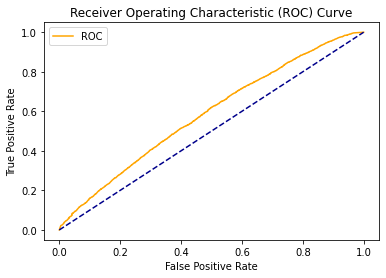

------------------------
Second model
--TfidfVectorizer--
Metrics accuracy score:  0.6590615185664142
ROC_AUC_SCORE :  0.7154294064530247


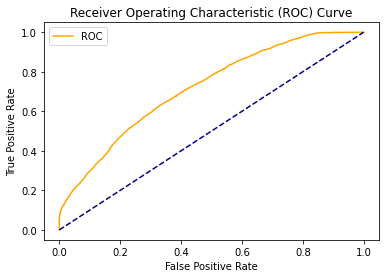

None


In [36]:
print(test_meilleur_model("train_master.csv"))